In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import time
import random
import statistics as sts
from scipy.stats.mstats import gmean 
from scipy import stats

import tensorflow as tf
from tensorflow.keras import backend as Bkd
from tensorflow.keras.layers import Lambda

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D,Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras import backend as K
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.compat.v1.random import set_random_seed

import math

from sklearn.preprocessing import MinMaxScaler

from keras.layers import TimeDistributed
from keras.backend import sigmoid

from keras.models import Sequential

plt.style.use('fivethirtyeight')

In [ ]:
WIND = 100
BATCH = 20
EPOCH = 50
UNIT = 150
activations=['swish']# 'relu' ,'tanh']

In [ ]:
print('-------------------------------------------------')
print('Window size = ',WIND)
print('Batch  size = ',BATCH)
print('Epochs      = ',EPOCH)
print('LSTM Units  = ',UNIT)
print('-------------------------------------------------')

-------------------------------------------------
Window size =  100
Batch  size =  20
Epochs      =  50
LSTM Units  =  150
-------------------------------------------------


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/DataSets_2015to2020/NDF_Drop_Nan.csv')
#df = pd.read_csv('/content/drive/MyDrive/DataSets_2015to2020/NDF.csv')
df = pd.read_csv('/content/drive/MyDrive/XAUUSD_M30.csv')
#df = pd.read_csv('drive/My Drive/Colab Notebooks/XAUUSD_M30.csv')


In [ ]:
df

,1614.15,1614.16,1613.35,1613.35.1
0,1613.37,1614.51,1613.33,1613.95
1,1613.91,1615.06,1612.70,1613.05
2,1613.02,1613.41,1611.74,1612.66
3,1612.76,1614.20,1612.53,1613.22
4,1613.19,1614.30,1612.98,1613.73
...,...,...,...,...
99963,1835.03,1837.88,1834.67,1837.65
99964,1837.68,1838.75,1836.66,1836.81
99965,1836.75,1837.29,1835.58,1835.94
99966,1835.89,1836.19,1834.59,1835.87


In [ ]:
len(df)

99968

# Feature Engineering

In [ ]:
df['oh'] = df['1614.15'] - df['1614.16']
df['ol'] = df['1614.15'] - df['1613.35']
df['hl'] = df['1614.16'] - df['1613.35']

In [ ]:
df['co'] = df['1613.35.1'] - df['1614.15']
df['hc'] = df['1614.16'] - df['1613.35.1']
df['cl'] = df['1613.35.1'] - df['1613.35']

In [ ]:
#df['03m-SMA-Open']=df['1614.15'].rolling(window=3).mean()
df['05m-SMA-Open']=df['1614.15'].rolling(window=5).mean()
#df['07m-SMA-Open']=df['1614.15'].rolling(window=7).mean()

#df['03m-SMA-High']=df['1614.16'].rolling(window=3).mean()
#df['05m-SMA-High']=df['1614.16'].rolling(window=5).mean()
#df['07m-SMA-High']=df['1614.16'].rolling(window=7).mean()

#df['03m-SMA-Low']=df['1613.35'].rolling(window=3).mean()
#df['05m-SMA-Low']=df['1613.35'].rolling(window=5).mean()
#df['07m-SMA-Low']=df['1613.35'].rolling(window=7).mean()

#df['03m-SMA-Close']=df['1613.35.1'].rolling(window=3).mean()
#df['05m-SMA-Close']=df['1613.35.1'].rolling(window=5).mean()
#df['07m-SMA-Close']=df['1613.35.1'].rolling(window=7).mean()

In [ ]:

def wma(df, column='close', n=20, add_col=False):

    weights = np.arange(1, n + 1)
    wmas = df[column].rolling(n).apply(lambda x: np.dot(x, weights) /
                                       weights.sum(), raw=True).to_list()

    if add_col == True:
        df[f'{column}_WMA_{n}'] = wmas
        return df
    else:
        return wmas

In [ ]:
#df['03m-WMA-Open'] = wma(df, column='1614.15',n=3,add_col=False)
#df['05m-WMA-Open'] = wma(df, column='1614.15',n=5,add_col=False)
#df['07m-WMA-Open'] = wma(df, column='1614.15',n=7,add_col=False)

#df['03m-WMA-High'] = wma(df, column='1614.16',n=3,add_col=False)
#df['05m-WMA-High'] = wma(df, column='1614.16',n=5,add_col=False)
df['07m-WMA-High'] = wma(df, column='1614.16',n=7,add_col=False)

#df['03m-WMA-Low'] = wma(df, column='1613.35',n=3,add_col=False)
#df['05m-WMA-Low'] = wma(df, column='1613.35',n=5,add_col=False)
#df['07m-WMA-Low'] = wma(df, column='1613.35',n=7,add_col=False)

#df['03m-WMA-Close'] = wma(df, column='1613.35.1',n=3,add_col=False)
#df['05m-WMA-Close'] = wma(df, column='1613.35.1',n=5,add_col=False)
#df['07m-WMA-Close'] = wma(df, column='1613.35.1',n=7,add_col=False)

In [ ]:
#Open_26_ewma = df['1614.15'].ewm(span=26, min_periods=0, adjust=True, ignore_na=True).mean()
#Open_12_ewma = df['1614.15'].ewm(span=12, min_periods=0, adjust=True, ignore_na=True).mean()
#df['26ema'] = Open_26_ewma
#df['12ema'] = Open_12_ewma
#df['MACD_Open'] = (df['12ema'] - df['26ema'])

#High_26_ewma = df['1614.16'].ewm(span=26, min_periods=0, adjust=True, ignore_na=True).mean()
#High_12_ewma = df['1614.16'].ewm(span=12, min_periods=0, adjust=True, ignore_na=True).mean()
#df['26ema'] = High_26_ewma
#df['12ema'] = High_12_ewma
#df['MACD_High'] = (df['12ema'] - df['26ema'])

#Low_26_ewma = df['1613.35'].ewm(span=26, min_periods=0, adjust=True, ignore_na=True).mean()
#Low_12_ewma = df['1613.35'].ewm(span=12, min_periods=0, adjust=True, ignore_na=True).mean()
#df['26ema'] = Low_26_ewma
#df['12ema'] = Low_12_ewma
#df['MACD_Low'] = (df['12ema'] - df['26ema'])

#close_26_ewma = df['1613.35.1'].ewm(span=26, min_periods=0, adjust=True, ignore_na=True).mean()
#close_12_ewma = df['1613.35.1'].ewm(span=12, min_periods=0, adjust=True, ignore_na=True).mean()
#df['26ema'] = close_26_ewma
#df['12ema'] = close_12_ewma
#df['MACD_Close'] = (df['12ema'] - df['26ema'])

In [ ]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [ ]:
#df['RSI_Open'] = computeRSI(df['1614.15'], 3)
df['RSI_Open'] = computeRSI(df['1614.15'], 5)
#df['RSI_Open'] = computeRSI(df['1614.15'], 7)

#df['RSI_High'] = computeRSI(df['1614.16'], 3)
#df['RSI_High'] = computeRSI(df['1614.16'], 5)
#df['RSI_High'] = computeRSI(df['1614.16'], 7)

#df['RSI_Low'] = computeRSI(df['1613.35'], 3)
#df['RSI_Low'] = computeRSI(df['1613.35'], 5)
#df['RSI_Low'] = computeRSI(df['1613.35'], 7)

#df['RSI_Close'] = computeRSI(df['1613.35.1'], 3)
#df['RSI_Close'] = computeRSI(df['1613.35.1'], 5)
#df['RSI_Close'] = computeRSI(df['1613.35.1'], 7)

In [ ]:
df

,1614.15,1614.16,1613.35,1613.35.1,oh,ol,hl,co,hc,cl,05m-SMA-Open,07m-WMA-High,26ema,12ema,MACD_High,RSI_Open
0,1613.37,1614.51,1613.33,1613.95,-1.14,0.04,1.18,0.58,0.56,0.62,NaN,NaN,1614.510000,1614.510000,0.000000,NaN
1,1613.91,1615.06,1612.70,1613.05,-1.15,1.21,2.36,-0.86,2.01,0.35,NaN,NaN,1614.795577,1614.807917,0.012340,NaN
2,1613.02,1613.41,1611.74,1612.66,-0.39,1.28,1.67,-0.36,0.75,0.92,NaN,NaN,1614.297753,1614.262309,-0.035443,NaN
3,1612.76,1614.20,1612.53,1613.22,-1.44,0.23,1.67,0.46,0.98,0.69,NaN,NaN,1614.270425,1614.242641,-0.027784,NaN
4,1613.19,1614.30,1612.98,1613.73,-1.11,0.21,1.32,0.54,0.57,0.75,1613.250,NaN,1614.277284,1614.258225,-0.019059,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,1835.03,1837.88,1834.67,1837.65,-2.85,0.36,3.21,2.62,0.23,2.98,1835.730,1837.588929,1844.100711,1839.444397,-4.656314,43.120673
99964,1837.68,1838.75,1836.66,1836.81,-1.07,1.02,2.09,-0.87,1.94,0.15,1835.766,1837.746071,1843.704362,1839.337567,-4.366795,55.908053
99965,1836.75,1837.29,1835.58,1835.94,-0.54,1.17,1.71,-0.81,1.35,0.36,1835.566,1837.574286,1843.229224,1839.022557,-4.206668,50.889249
99966,1835.89,1836.19,1834.59,1835.87,-0.30,1.30,1.60,-0.02,0.32,1.28,1835.710,1837.186071,1842.707800,1838.586779,-4.121022,46.105143


In [ ]:
df = np.array(df)

In [ ]:
for i in range(4,44):
  for j in range(len(df)):
    if np.isnan(df[j,i]):
      df[j,i]=0

In [ ]:
df = pd.DataFrame(df)

# **continiue**

In [ ]:
trainsize=int(len(df)*0.6)
testsize=len(df)-trainsize

In [ ]:
Total_len = len(df)
Train_len = Total_len - testsize
Test_len = Total_len - Train_len
Train = df.head(n = Train_len)
Test = df.tail(n = Test_len)

In [ ]:
 P = ((Train[Train.columns[0]] + Train[Train.columns[1]] + Train[Train.columns[2]] + Train[Train.columns[3]]) / 4)

In [ ]:
type(P)

pandas.core.series.Series

In [ ]:
P1 = np.array(P)

In [ ]:
print(type(P))
print(type(P1))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
m = stats.mode(P1)
print(m)

ModeResult(mode=array([1229.99]), count=array([7]))


In [ ]:
    MODE = 1229.99
    H_MEAN = sts.harmonic_mean(P)
    G_MEAN = gmean(P)
    VAR = sts.stdev(P)
    Train_Min = min(Train.min())
    Train_Max = max(Train.max())
    print('mode= ', MODE)
    print('min = ', Train_Min)
    print('Max = ', Train_Max)
  
    print('Harmonic Avg. = ', H_MEAN)
    print('Geometric Mean = ', G_MEAN)

mode=  1229.99
min =  -49.26999999999998
Max =  1795.87
Harmonic Avg. =  1286.2506898255112
Geometric Mean =  1295.0314390513633


In [ ]:
ColList=range(4)
ColList = list(ColList)

In [ ]:
    DF_std = Train.copy()
    DF_Mode =Train.copy()
    DF_HM = Train.copy()
    DF_GM = Train.copy()
    DF_temp = (Train.iloc[:, ColList] - Train_Min) / (Train_Max - Train_Min)
    DF_std[ColList] = DF_temp
    Train_std = DF_std[ColList]
    DF_temp = (Test.iloc[:, ColList] - MODE) / (Train_Max - Train_Min)
    DF_Mode[ColList] = DF_temp
    Train_Mode = DF_Mode[ColList]
    DF_temp = (Train.iloc[:, ColList] - H_MEAN) / (Train_Max - Train_Min)
    DF_HM[ColList] = DF_temp
    Train_HM = DF_HM[ColList]
    DF_temp = (Train.iloc[:, ColList] - G_MEAN) / ( - Train_Min)
    DF_GM[ColList] = DF_temp
    Train_GM = DF_GM[ColList]

In [ ]:
    DF_std = Test.copy()
    DF_Mode = Test.copy()
    DF_HM = Test.copy()
    DF_GM = Test.copy()
    DF_temp = (Test.iloc[:, ColList] - Train_Min) / (Train_Max - Train_Min)
    DF_std[ColList] = DF_temp
    Test_std = DF_std[ColList]
    DF_temp = (Test.iloc[:, ColList] - MODE) / (Train_Max - Train_Min)
    DF_Mode[ColList] = DF_temp
    Test_Mode = DF_Mode[ColList]
    DF_temp = (Test.iloc[:, ColList] - H_MEAN) / (Train_Max - Train_Min)
    DF_HM[ColList] = DF_temp
    Test_HM = DF_HM[ColList]
    DF_temp = (Test.iloc[:, ColList] - G_MEAN) / ( - Train_Min)
    DF_GM[ColList] = DF_temp
    Test_GM = DF_GM[ColList]

In [ ]:
    DF_df = df.copy()
    DF_temp = (df.iloc[:, ColList] - G_MEAN) / ( - Train_Min)
    DF_df[ColList] = DF_temp
    df_prime = DF_df[ColList]

In [ ]:
Train_MinMax = Train_std * (Train_Max - Train_Min) + Train_Min
Train_M_MinMax = Train_Mode * (Train_Max - Train_Min) + Train_Min
Train_H_MinMax = Train_HM * (Train_Max - Train_Min) + Train_Min
Train_G_MinMax = Train_GM * (Train_Max - Train_Min) + Train_Min

In [ ]:
Test_MinMax = Test_std * (Train_Max - Train_Min) + Train_Min
Test_M_MinMax = Test_Mode * (Train_Max - Train_Min) + Train_Min
Test_H_MinMax = Test_HM * (Train_Max - Train_Min) + Train_Min
Test_G_MinMax = Test_GM * (Train_Max - Train_Min) + Train_Min

In [ ]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(dataset[i+time_step, :])
    return np.array(dataX), np.array(dataY)

In [ ]:
Train_std.shape

(79974, 4)

In [ ]:
type(Train_std)

pandas.core.frame.DataFrame

In [ ]:
Train_std = np.array(Train_std)
Test_std = np.array(Test_std)

In [ ]:
#pca = PCA()
#Train_std_pca = pca.fit(Train_std)
#Test_std_pca = pca.fit(Test_std)

In [ ]:
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance');

In [ ]:
#num_components = 10
#pca = PCA(num_components)  
#Train_std_pca = pca.fit_transform(Train_std)
#Test_std_pca = pca.fit_transform(Test_std)

In [ ]:
xtrain, ytrain = create_dataset(Train_std, WIND)

In [ ]:
xtest, ytest = create_dataset(Test_std, WIND)

In [ ]:
df

,1614.15,1614.16,1613.35,1613.35.1
0,1613.37,1614.51,1613.33,1613.95
1,1613.91,1615.06,1612.70,1613.05
2,1613.02,1613.41,1611.74,1612.66
3,1612.76,1614.20,1612.53,1613.22
4,1613.19,1614.30,1612.98,1613.73
...,...,...,...,...
99963,1835.03,1837.88,1834.67,1837.65
99964,1837.68,1838.75,1836.66,1836.81
99965,1836.75,1837.29,1835.58,1835.94
99966,1835.89,1836.19,1834.59,1835.87


In [ ]:
xtest = xtest[:90]
ytest = ytest[:90]

In [ ]:
print('training samples: ', xtest.shape)
print('testing samples: ', ytest.shape)

training samples:  (90, 3, 4)
testing samples:  (90, 4)


In [ ]:
print('training samples: ', xtrain.shape)
print('testing samples: ', ytrain.shape)

training samples:  (79971, 3, 4)
testing samples:  (79971, 4)


In [ ]:
def swish(x, beta = 1):
   return (x * sigmoid(beta * x))
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [ ]:
def FLF(yTrue, yPred):

  lam = 0.1
  v   = Lambda(lambda x: x*0.9)((yTrue-yPred))
  vn  = Lambda(lambda x: x*lam)(K.abs((yTrue[:,1]+yTrue[:,2])/2 - (yPred[:,1]+yPred[:,2])/2))
  vn1 = Lambda(lambda x: x*lam)(K.abs((yTrue[:,0]+yTrue[:,3])/2 - (yPred[:,0]+yPred[:,3])/2))
  vx  = K.square((v[:,0]-vn1))
  vy  = K.square((v[:,1]-vn))
  vz  = K.square((v[:,2]-vn))
  v4  = K.square((v[:,3]-vn1))
  vm  = K.concatenate([vx, vy, vz, v4])
  vmx = K.mean(vm)
  return vmx

In [ ]:
xtrain.shape

(79971, 3, 4)

In [ ]:
xtrain.shape

(79971, 3, 4)

In [ ]:
model = Sequential()
model.add(Conv1D(64, 3, input_shape= (3,4), padding='same'))
#model.add(MaxPooling1D(pool_size = (2)))
model.add(Conv1D(32, 3, padding='same'))
model.add(Flatten())
#model.add(MaxPooling1D(pool_size = (2)))
model.add(Dense(4))
model.add(Activation('linear'))
model.build((None, 3,4))
print(model.summary())
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
model2 = Sequential()
model2.add(LSTM(256,input_shape=(xtrain.shape[1], xtrain.shape[2]), activation= 'tanh',return_sequences=True))
model2.add(LSTM(256,activation= 'tanh'))
model2.add(Dense(4))
model2.build((None,3,4))
print(model2.summary())

opt = Adam(lr=0.00001)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 3, 64)             832       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 3, 32)             6176      
_________________________________________________________________
flatten_2 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 388       
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
Total params: 7,396
Trainable params: 7,396
Non-trainable params: 0
_________________________________________________________________
None
--------------------------------------------------------------------------------------
--------------------------

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(optimizer=opt,loss=FLF)
model2.compile(optimizer=opt,loss=FLF)

In [ ]:
model.fit(xtrain, ytrain, epochs=15, batch_size=20, validation_data=(xtest, ytest))
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
#model2.fit(xtrain, ytrain, epochs=20, batch_size=3, validation_data=(xtest, ytest))

Epoch 1/15
3999/3999 [==============================] - 44s 4ms/step - loss: 0.0014 - val_loss: 1.7815e-06
Epoch 2/15
3999/3999 [==============================] - 16s 4ms/step - loss: 6.4558e-06 - val_loss: 2.2817e-06
Epoch 3/15
3999/3999 [==============================] - 16s 4ms/step - loss: 6.3074e-06 - val_loss: 1.8634e-06
Epoch 4/15
3999/3999 [==============================] - 16s 4ms/step - loss: 5.9198e-06 - val_loss: 2.0064e-06
Epoch 5/15
3999/3999 [==============================] - 16s 4ms/step - loss: 5.5187e-06 - val_loss: 2.2192e-06
Epoch 6/15
3999/3999 [==============================] - 16s 4ms/step - loss: 5.1349e-06 - val_loss: 1.7849e-06
Epoch 7/15
3999/3999 [==============================] - 15s 4ms/step - loss: 4.8221e-06 - val_loss: 1.2963e-06
Epoch 8/15
3999/3999 [==============================] - 16s 4ms/step - loss: 4.5297e-06 - val_loss: 1.2255e-06
Epoch 9/15
3999/3999 [==============================] - 16s 4ms/step - loss: 4.2894e-06 - val_loss: 1.0910e-06
Epoch

In [ ]:
accuracy=model.evaluate(xtest,ytest)
print(accuracy)
print('-----------------------------------------------------------------------------------')
#accuracy2=model.evaluate(xtest,ytest)
#print(accuracy2)

3/3 [==============================] - 0s 14ms/step - loss: 1.1614e-06
1.1613990409387043e-06
-----------------------------------------------------------------------------------


In [ ]:
test_pred = model.predict(xtest)
#test_pred2 = model2.predict(xtest)

In [ ]:
#test_pred2.shape

In [ ]:
print(ytest.shape)


(90, 4)


In [ ]:
ytest_rescale = ytest * (Train_Max - Train_Min) + Train_Min

In [ ]:
ytest_rescale

array([[1274.14, 1275.12, 1273.77, 1273.93],
       [1273.93, 1275.32, 1273.32, 1274.06],
       [1274.06, 1275.03, 1274.05, 1274.5 ],
       [1274.5 , 1276.43, 1274.11, 1275.23],
       [1275.23, 1276.59, 1275.22, 1275.8 ],
       [1275.8 , 1276.17, 1275.29, 1276.07],
       [1276.07, 1276.35, 1275.57, 1275.96],
       [1275.96, 1277.72, 1275.87, 1276.69],
       [1276.69, 1277.75, 1276.3 , 1277.57],
       [1277.49, 1277.83, 1276.92, 1277.14],
       [1277.14, 1277.36, 1276.65, 1277.25],
       [1277.22, 1283.71, 1276.86, 1282.87],
       [1282.87, 1283.58, 1281.21, 1282.73],
       [1282.73, 1282.73, 1279.22, 1279.94],
       [1279.94, 1284.15, 1279.49, 1283.41],
       [1283.4 , 1285.26, 1283.21, 1283.85],
       [1283.9 , 1286.35, 1282.98, 1285.45],
       [1285.45, 1287.27, 1285.37, 1285.98],
       [1285.98, 1286.57, 1285.09, 1286.21],
       [1286.21, 1286.37, 1285.11, 1285.45],
       [1285.43, 1285.97, 1284.87, 1285.67],
       [1285.67, 1286.75, 1284.69, 1285.6 ],
       [12

In [ ]:
Test_Pred_MinMax = test_pred * (Train_Max - Train_Min) + Train_Min
#Test_Pred_MinMax2 = test_pred2 * (Train_Max - Train_Min) + Train_Min
print('-------------------------------------------------------------')
#print(type(Test_Pred_MinMax2))
print(type(Test_Pred_MinMax))
#print(Test_Pred_MinMax2.shape)
print(Test_Pred_MinMax.shape)

-------------------------------------------------------------
<class 'numpy.ndarray'>
(90, 4)


In [ ]:
print('-------------------------------------------------------------')
print(type(Test_MinMax))
print(Test_MinMax.shape)

-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
(19994, 4)


In [ ]:
Test_MinMax = np.array(Test_MinMax)

In [ ]:
Test_MinMax = Test_MinMax[:90]

In [ ]:
print(df.shape)
print(test_pred.shape)
print(ytest.shape)
print(Test_Pred_MinMax.shape)
print(Test_MinMax.shape)

(99968, 4)
(90, 4)
(90, 4)
(90, 4)
(90, 4)


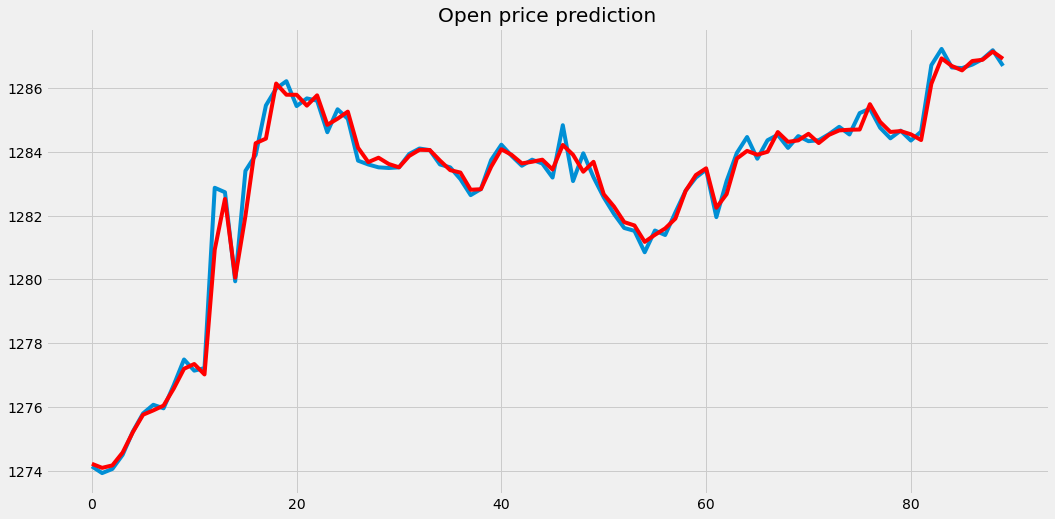

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(ytest_rescale[(len(ytest_rescale)-90):,0])
plt.plot(Test_Pred_MinMax[(len(Test_Pred_MinMax)-90):,0],'red')
#plt.plot(Test_Pred_MinMax2[(len(Test_Pred_MinMax2)-90):,0],'green')
plt.title("Open price prediction")
plt.show()


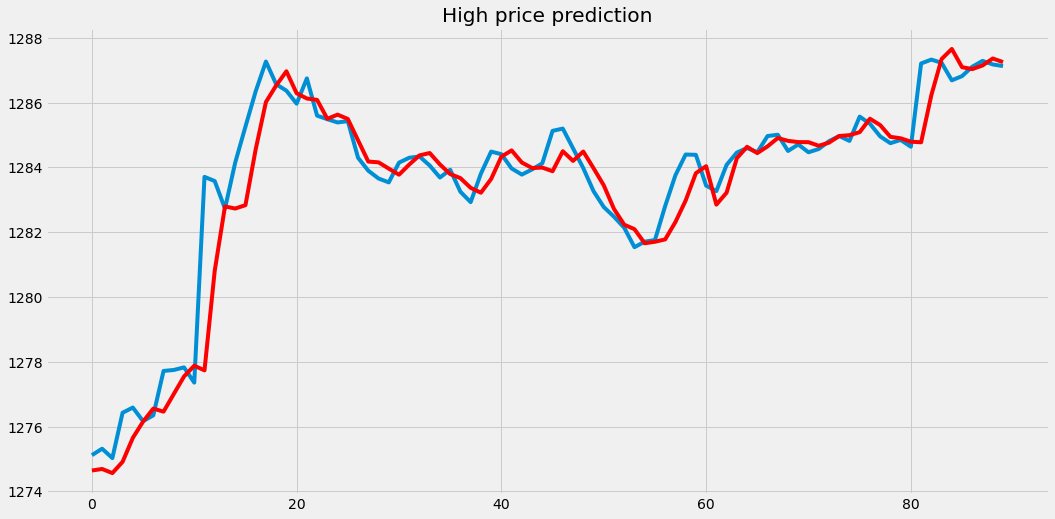

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(ytest_rescale[(len(ytest_rescale)-90):,1])
plt.plot(Test_Pred_MinMax[(len(Test_Pred_MinMax)-90):,1],'red')
#plt.plot(Test_Pred_MinMax2[(len(Test_Pred_MinMax2)-90):,1],'green')
plt.title("High price prediction")
plt.show()

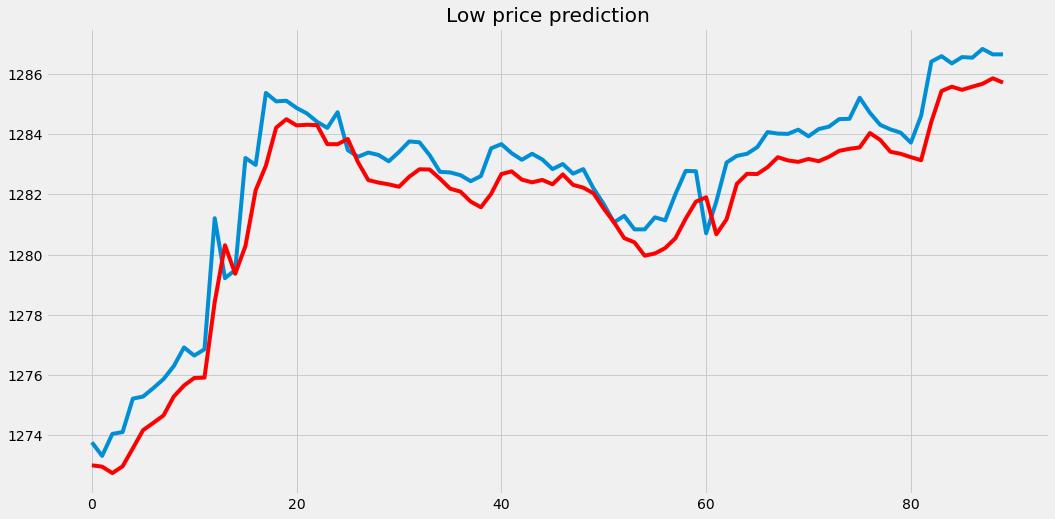

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(ytest_rescale[(len(ytest_rescale)-90):,2])
plt.plot(Test_Pred_MinMax[(len(Test_Pred_MinMax)-90):,2],'red')
#plt.plot(Test_Pred_MinMax2[(len(Test_Pred_MinMax2)-90):,2],'green')
plt.title("Low price prediction")
plt.show()

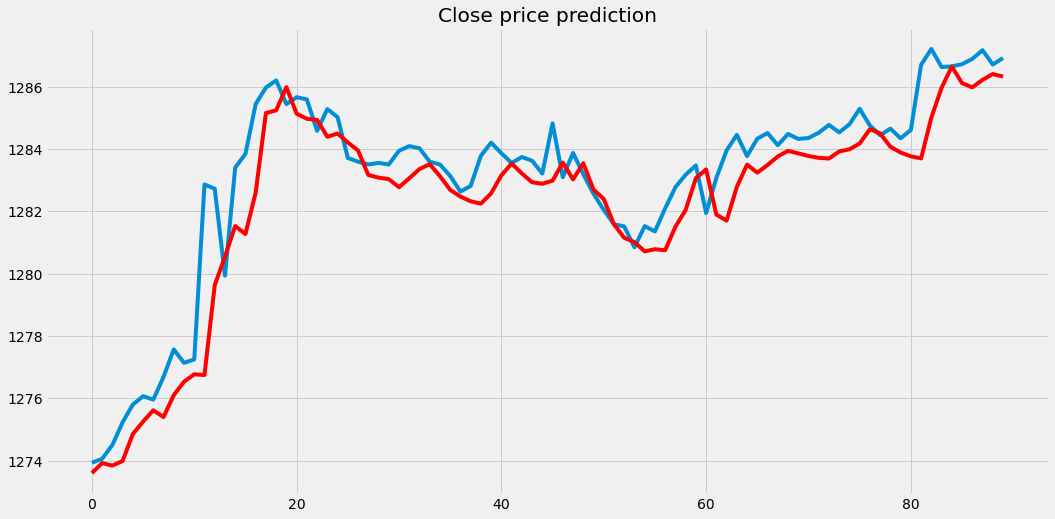

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(ytest_rescale[(len(ytest_rescale)-90):,3])
plt.plot(Test_Pred_MinMax[(len(Test_Pred_MinMax)-90):,3],'red')
#plt.plot(Test_Pred_MinMax2[(len(Test_Pred_MinMax2)-90):,1],'green')
plt.title("Close price prediction")
plt.show()